<div style="width:100%"><a href="https://www.routledge.com/Python-Programming-for-Mathematics/Guillod/p/book/9781032910116"><img src="https://python.guillod.org/book/banner1.png"/></a></div>

This file reflects the statements of the exercises of a chapter of the book *[Python Programming for Mathematics](https://www.routledge.com/Python-Programming-for-Mathematics/Guillod/p/book/9781032910116)*.
All statements can be downloaded in [Jupyter Notebook](https://python.guillod.org/book/) format or executed directly online on [GESIS](https://notebooks.gesis.org/binder/v2/gh/guillod/python-book/HEAD).
The answers are available in the book (ISBN [9781032910116](https://www.routledge.com/Python-Programming-for-Mathematics/Guillod/p/book/9781032910116)) and ebook (ISBN [9781003565451](https://www.routledge.com/Python-Programming-for-Mathematics/Guillod/p/book/9781003565451)) published by Chapman & Hall/CRC Press in the Python Series.
This file reflects the exercises as published in this book and differs somewhat from the exercises presented on the page [python.guillod.org](https://python.guillod.org/).

# 9 Root finding

<div id="ch:newton"></div>

The aim of this series of exercises is to determine the roots of a function in an approximate way, in particular by Newton's method. This allows in particular to find approximate solutions of nonlinear equations. This method is fundamental both from a numerical and an analytical point of view.

**Concepts abordés:**

* Newton's method in one and several dimensions

* Jacobian matrix

* Newton's method attractor

* fractal set

* optimization by parallelization

* non-linear differential equation

* finite differences

# Exercise 9.1: Newton's method in one dimension

In one dimension, Newton's method consists in finding an approximate solution of a single equation. This equation can be put in the general form $F(x)=0$, where $F:\mathbb{R}\to\mathbb{R}$ is a fairly regular function so, the goal is to find a zero of the function $F$. The equation $F(x)=0$ is equivalent (if $F^\prime(x) \neq 0$) to the equation $G(x)=x$, where $G$ is the function defined by:

$$
G(x) = x - \frac{F(x)}{F^\prime(x)} \,.
$$

Newton's method consists in finding a fixed point of $G$, *i.e.*, solving $G(x)=x$ by successive iterations:

$$
x_{i+1} = G(x_i) = x_i - \frac{F(x_i)}{F^\prime(x_i)} \,,
$$

from an initial value $x_0\in\mathbb{R}$.
When the sequence $(x_i)_ {i\in\mathbb{N}}$ converges, then the limit $x$ is a solution of $G(x)=x$ therefore of $F(x)=0$.

**a)**
Write a function `newton1d(F, DF, x0, eps=1e-10, N=1000)` that given a function $F$, its derivative $F^\prime$, and an initial value $x_0$ computes Newton's iterations until $|F(x_{i})| < \varepsilon$ and returns $x_{i}$. If $N$ iterations were not enough to reach this convergence criterion, then return an error.

**b)**
Using the function defined above, find an approximate solution of the equation $e^{-x} = x$.

**Answer.**
The solution is approximately given by $x=0.56714$.

**c)**
Without using the function `sqrt`, `log`, or fractional powers, define a function `root(x,n)` that computes $\sqrt[n]{x}$.

Sometimes, the derivative of the function $F$ cannot be calculated analytically, so it is necessary to approximate it numerically:

$$
F^\prime(x_i) \approx \frac{F(x_i) - F(x_{i-1})}{x_i-x_{i-1}} \,,
$$

which leads to the secant method:

$$
x_{i+1} =  x_i - F(x_i) \frac{x_i-x_{i-1}}{F(x_i) - F(x_{i-1})} = \frac{x_{i-1}F(x_{i})-x_{i}F(x_{i-1})}{F(x_{i})-F(x_{i-1})} \,
$$

where $x_0$ and $x_1$ must be chosen.

**d)**
Write a method `secant1d(F, x0, x1, eps=1e-10, N=1000)` implementing the secant method and test it on the previous example.

# Exercise 9.2: Newton's method in several dimensions

<div id="exer:newton-Rn"></div>

Newton's method in one dimension is easily generalized to several dimensions to solve equations of the form $F(\boldsymbol{x})=\boldsymbol{0}$, where $F:\mathbb{R}^n \to \mathbb{R}^n$ is a fairly regular function.
Conceptually, the method is identical: the equation $F(\boldsymbol{x})=\boldsymbol{0}$ is equivalent to $G(\boldsymbol{x})=\boldsymbol{x}$ with the function $G$ defined by:

$$
G(\boldsymbol{x}) = \boldsymbol{x} - \big(F^\prime(\boldsymbol{x})\big)^{-1} F(\boldsymbol{x}) \,,
$$

where $F^\prime(\boldsymbol{x})$ denotes the Jacobian matrix of size $n \times n$ of $F$ in $x$.
Thus, Newton's iterations are written:

$$
\boldsymbol{x}_{i+1} = \boldsymbol{x}_{i} - \big(F^\prime(\boldsymbol{x}_i)\big)^{-1} F(\boldsymbol{x}_i) \,.
$$

**a)**
Write a function `newton(F, DF, x0, eps=1e-12, N=10000)` implementing Newton's method in more than one dimension.

**Hint.**
To have an optimal performance, one should not invert the Jacobian matrix but solve a linear system with $F(\boldsymbol{x}_i)$ as second member.

**b)**
Use the previous function to solve the following system:

$$
\begin{align*}
\cos(x) & =\sin(y)\,, & e^{-x} & =\cos(y)\,.
\end{align*}
$$

**Answer.**
A solution is approximately given by $x=0.58853$ and $y=0.98226$.

# Exercise 9.3: Newton's method attractor

The goal of this exercise is to solve the equation $z^3 = 1$ in the complex plane using Newton's method and to analyze to which of the three roots of unity the method will converge depending on the choice of the initial point $z_0$.

**a)**
If necessary, adapt the function `newton1d` so that it also applies to complex numbers and test it to solve $z^3 = 1$ from different values of $z_0$.

**b)**
Determine for each $z_0 \in \big\{x_0+iy_0: x_0\in[-3,3] \; \text{and} \; y_0\in[-3,3]\big\}$ to which root of unity Newton's method will converge. Represent graphically this set as on the following figure.

**Hint.**
NumPy's `meshgrid` function can be useful to construct the matrix corresponding to the set of $z_0$.

<center>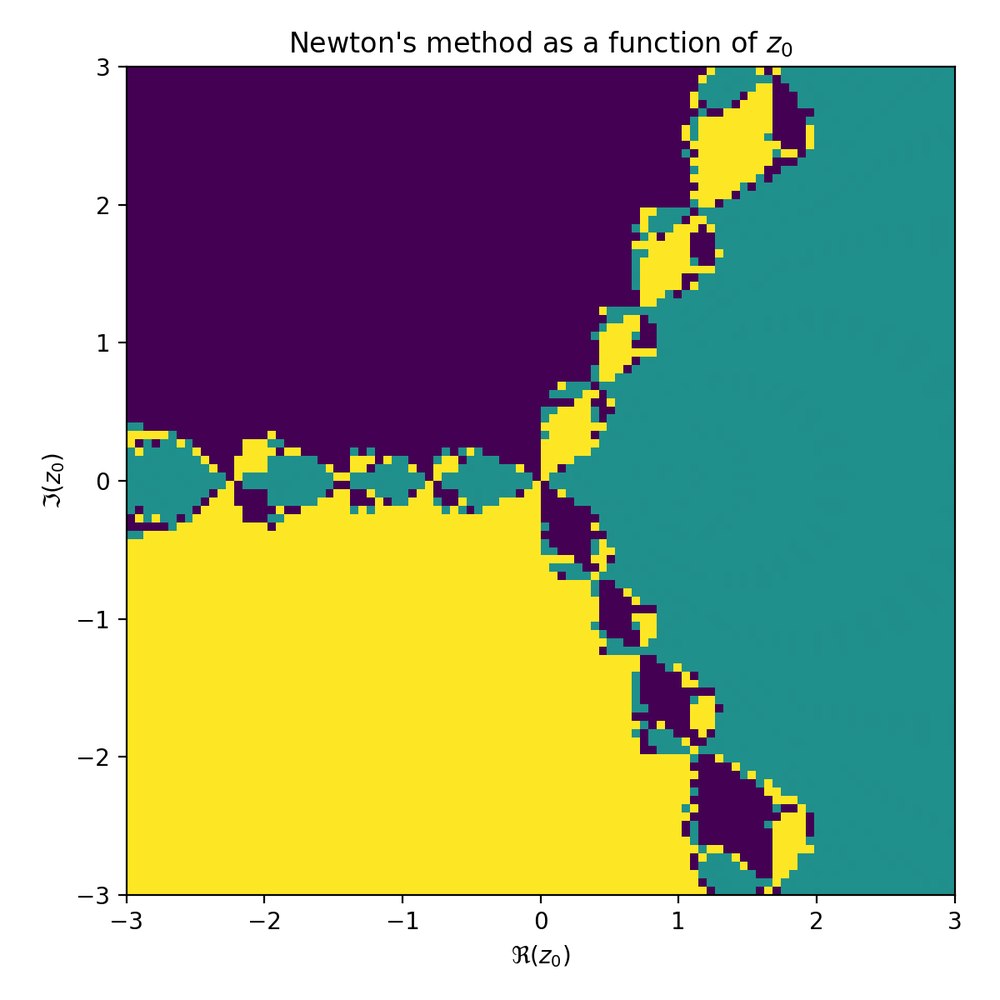</center>

**c)**
<font color="red">!</font> The previous method has the disadvantage of proceeding sequentially to the calculation for each value of $z_0$, which makes this evaluation rather slow. Propose a new implementation allowing to compute in parallel all the values of $z_0$ using NumPy indexing.

**Hint.**
To speed-up the method even more, Newton's iterations of $F(z)=z^3-1$ can be calculated by hand:

$$
z_{n+1} = \frac{1}{3z_n^2} + \frac{2z_n}{3} \,.
$$



<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercise 9.4: <font color="red">!!</font> Nonlinear differential equation

<div id="exer:newton-nonlinear"></div>

The goal is to solve the following differential equation with boundary conditions:

$$
\begin{align*}
u^{\prime\prime}(x)+u^{3}(x) & = \sin(x) \,, & u(0) & = u(2\pi) = 0 \,,
\end{align*}
$$

on the interval $[0,2\pi]$. This equation is a simplified model for a nonlinear Schrödinger equation.

The method used is finite differences that consists in looking for the values of $u$ at the points $x_n = \frac{2\pi n}{N}$ for $n=0,1,\dots,N$. The unknowns are then the numbers $u_n = u(x_n)$ and form a vector of dimension $N+1$. The finite difference method consists in approximating the second derivative by:

$$
u^{\prime\prime}(x) \approx \frac{u(x+h)-2u(x)+u(x-h)}{h^{2}} \,,
$$

when $h$ is small.
Taking $h=\frac{2\pi}{N}$, then:

$$
u^{\prime\prime}(x_n) \approx \frac{u_{n+1}-2u_n+u_{n-1}}{h^{2}} \,,
$$

and so the initial equation is approximated by:

$$
\begin{align*}
\frac{u_{n+1}-2u_{n}+u_{n-1}}{h^{2}}+u_{n}^{3} & = \sin(x_{n}) \,, & u_{0} & = u_{N} = 0 \,,
\end{align*}
$$

for $n=1,2,\dots,N-1$.
This equation can be seen as an equation of the type $F(\boldsymbol{u})=\boldsymbol{0}$ for $\boldsymbol{u} = (u_n)_ {n=0}^{N+1}$ and thus be solved by Newton's method.

**a)**
Show the following approximation:

$$
u^{\prime\prime}(x) = \frac{u(x+h)-2u(x)+u(x-h)}{h^{2}} + O(h^2) \quad \text{as} \quad h \to 0 \,.
$$

**Hint.**
Use Taylor's theorem.

**b)**
Define a vector `x` representing $N+1$ evenly spaced points in $[0,2\pi]$ and `h` the distance between the points, with, for example, $N=200$.

**c)**
Define a function `F(u)` representing the function $F:\mathbb{R}^{N+1} \to \mathbb{R}^{N+1}$ allowing to put the approximated equation in the form $F(\boldsymbol{u})=\boldsymbol{0}$.

**Hint.**
To have a fast implementation, it is imperative to use the NumPy slicing instead of a loop to build $F$.

**d)**
Define a function `DF(u)` representing the Jacobian of the previous function.

**Hint.**
The Jacobian is the derivative of $F(\boldsymbol{u})=F(u_0,u_1,\dots,u_{N})$ with respect to $\boldsymbol{u} = (u_0,u_1,\dots,u_{N})$, *i.e.*:

$$
F^{\prime}(\boldsymbol{u})=\begin{pmatrix}\partial_{0}F(\boldsymbol{u}) & \partial_{1}F(\boldsymbol{u}) & \partial_{2}F(\boldsymbol{u}) & \cdots & \partial_{N-1}F(\boldsymbol{u}) & \partial_{N}F(\boldsymbol{u})\end{pmatrix}\,,
$$

and can be calculated explicitly by hand.

**e)**
Use the `newton` function defined earlier to calculate an approximate solution of the equation. By changing the initial values, is it possible to find other solutions?

**Hint.**
Try with the initial data $u_0(x) = (1+k)\sin(kx)$ for $k=1,2,3,4$ as the starting point of Newton's method.